In [15]:
# -*- coding: utf-8 -*-
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#    http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or
# implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#

# Decission trees

URLs
* [IAML: Decision Trees - slides](http://www.inf.ed.ac.uk/teaching/courses/iaml/2011/slides/dt.pdf)
* [Decision tree pruning](https://www.ismll.uni-hildesheim.de/lehre/ml-08w/skript/decision_trees2.pdf)
* https://github.com/FIIT-IAU

In [16]:
import math
import pandas as pd
import numpy as np
from sklearn import tree

import matplotlib.pyplot as plt
import seaborn
plt.rcParams['figure.figsize'] = 15, 10

### Entropy

In [17]:
-(9/14)*math.log2(9/14) - (5/14)*math.log2(5/14)

0.9402859586706311

In [18]:
-(9/15)*math.log2(9/15) - (6/15)*math.log2(6/15)

0.9709505944546686

### Gini

In [19]:
1 - ((9/14)**2 + (5/14)**2)

0.4591836734693877

In [20]:
1 - ((9/15)**2 + (6/15)**2)

0.48

# 1. Iris dataset

[Text(418.5, 498.3, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(354.11538461538464, 407.70000000000005, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(482.8846153846154, 407.70000000000005, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(257.53846153846155, 317.1, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(128.76923076923077, 226.5, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(64.38461538461539, 135.89999999999998, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(193.15384615384616, 135.89999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(386.3076923076923, 226.5, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(321.9230769230769, 135.89999999999998, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(450.69230769230774, 135.89999999999998, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(386.3076923076923, 45.

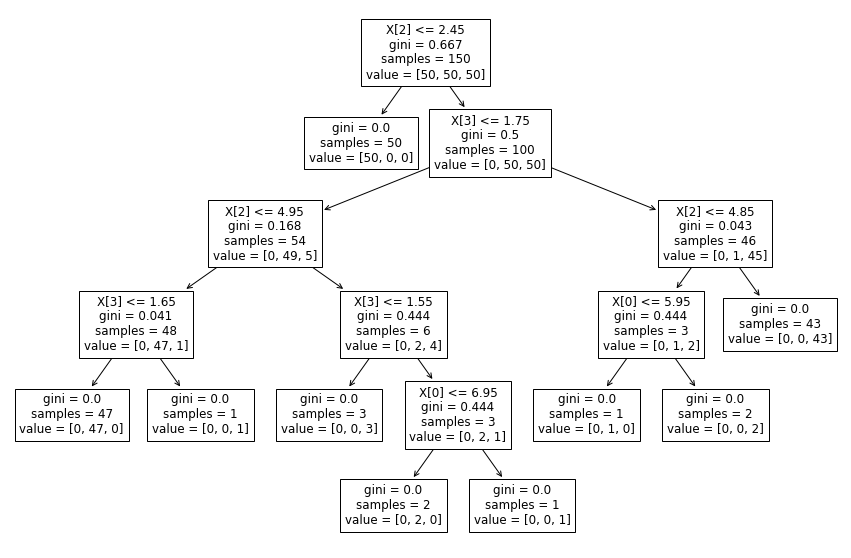

In [21]:
from sklearn.datasets import load_iris

# X, y = load_iris(return_X_y=True)
iris = load_iris()
X = iris.data
y = iris.target

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

tree.plot_tree(clf) 

In [22]:
from sklearn.model_selection import cross_val_score

cross_val_score(clf, iris.data, iris.target, cv=10)

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 0.93333333, 1.        , 1.        ])

# 2. Weather dataset (typical example of decision tree usage)

In [23]:
# data = pd.read_csv('data/tenis.csv')
data = pd.read_csv('data/weather.csv')
data

,Outlook,Temperature,Humidity,Wind,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [24]:
from sklearn.tree import DecisionTreeClassifier
cls = DecisionTreeClassifier(criterion='entropy')

# X = data.loc[data.index < 14, ['Outlook', 'Humidity', 'Wind']]
X = data.loc[data.index < 14, ['Outlook', 'Temperature', 'Humidity', 'Wind']]
y = data.loc[data.index < 14, 'Play']
cls.fit(X, y)

ValueError: could not convert string to float: 'Sunny'

The previous code is written intentionally :D

### Scikit-learn vie pracovať len s numerickými hodnotami

In [25]:
# One-hot encoding - kodovanie vsetkych dat okrem predikovaneho stlpcu
encoded = pd.concat([pd.get_dummies(data[column], prefix=column) for column in set(data.columns) - {'Play'}], axis=1)
encoded

,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Outlook_Overcast,Outlook_Rain,Outlook_Sunny,Wind_Strong,Wind_Weak
0,0,1,0,1,0,0,0,1,0,1
1,0,1,0,1,0,0,0,1,1,0
2,0,1,0,1,0,1,0,0,0,1
3,0,0,1,1,0,0,1,0,0,1
4,1,0,0,0,1,0,1,0,0,1
5,1,0,0,0,1,0,1,0,1,0
6,1,0,0,0,1,1,0,0,1,0
7,0,0,1,1,0,0,0,1,0,1
8,1,0,0,0,1,0,0,1,0,1
9,0,0,1,0,1,0,1,0,0,1


### Čo by sa stalo s hodnotou v testovacích dátach, ale nebola v trenovacích datách?

## 2.1 Natrénujem klasifikátor na trénovacích dátach

(posledný riadok bude testovacie dáta)

In [26]:
X = encoded[encoded.index < 14]
y = data.loc[data.index < 14, 'Play']

cls.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [27]:
test = encoded[encoded.index == 14]
cls.predict(test)

array(['Yes'], dtype=object)

## 2.2 Natrénovaný strom (klasifikátor) si môžem vizualizovať

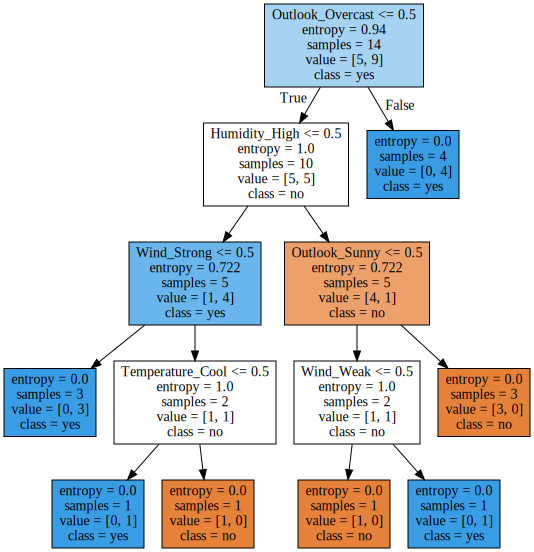

In [31]:
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import SVG

graph = Source(export_graphviz(cls, 
                               out_file=None,
                               feature_names=encoded.columns,
                               class_names=['no', 'yes'],
                               filled = True))

display(SVG(graph.pipe(format='svg')))

from IPython.display import HTML # toto je tu len pre to aby sa mi obrazok zmestil na obrazovku
style = "<style>svg{width:100% !important;height:70% !important;}</style>"
HTML(style)

[Text(502.20000000000005, 489.24, 'X[5] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(418.5, 380.52000000000004, 'X[3] <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]'),
 Text(167.4, 271.8, 'X[8] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(83.7, 163.08000000000004, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(251.10000000000002, 163.08000000000004, 'X[0] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(167.4, 54.360000000000014, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(334.8, 54.360000000000014, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(669.6, 271.8, 'X[7] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(585.9, 163.08000000000004, 'X[9] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(502.20000000000005, 54.360000000000014, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(669.6, 54.360000000000014, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(753.3000000000001, 163.080000

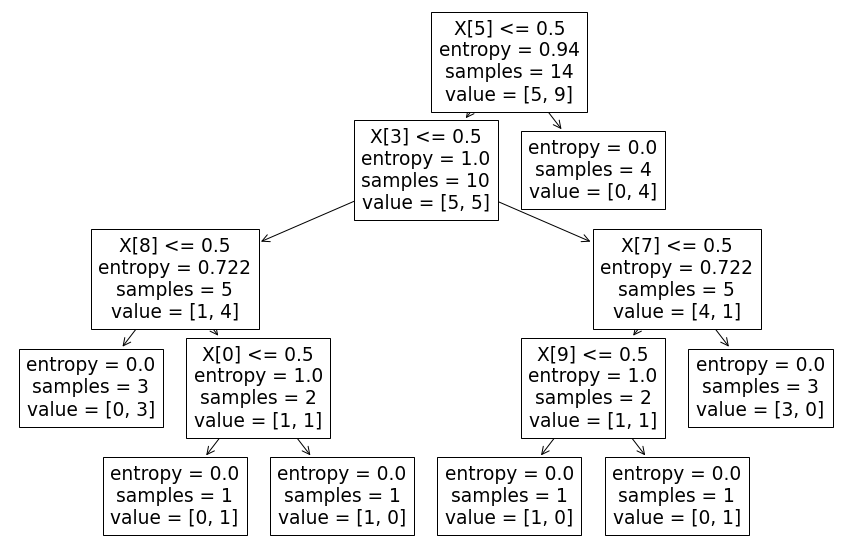

In [32]:
tree.plot_tree(cls)

# 3. Breast cancer dataset (overfitting example)

In [33]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

label_names = data['target_names']
labels = data['target']

feature_names = data['feature_names']
features = data['data']

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Rozdelíme údaje
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=4)

print('# train data: ', len(X_train))
print('# test data: ', len(X_test))

# train data:  455
# test data:  114


## 3.1 Natrénujem si viacero stromov
**kde každému obmedzím jeho maximálnu hĺbku aby som vytvoril stromy s rôznou zložitosťou.**

In [35]:
results = []
estimators = []
for i in range(1, X_train.shape[1] + 1):  
    row = {'model_complexity': i}
    
    # Vytvoríme rozhodovací strom
    # strom s maximalnou hlbkou 1-pocet atributov,  simulujeme tak zlozitost modelu
    clf = DecisionTreeClassifier(max_depth = i) 
    
    # natrenovanie modelu a predikovanie na trenovacej sade
    pred = clf.fit(X_train, y_train).predict(X_train) 
    
    # chyba na trenovacej sade
    row['train'] = 1-accuracy_score(y_train, pred) 
    
    # predickcia
    pred = clf.predict(X_test)
    
    # chyba na testovacej sade
    row['test'] = 1-accuracy_score(y_test, pred) 
    results.append(row)
    estimators.append(clf)

In [36]:
complexity_df = pd.DataFrame(results)
complexity_df.head()

,model_complexity,train,test
0,1,0.065934,0.140351
1,2,0.052747,0.131579
2,3,0.021978,0.114035
3,4,0.017582,0.114035
4,5,0.008791,0.052632


<AxesSubplot:xlabel='model_complexity'>

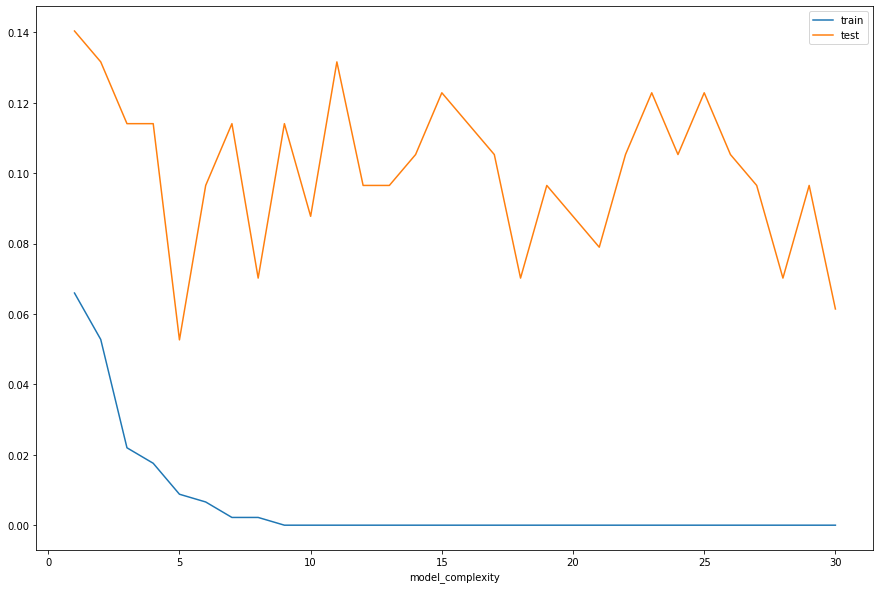

In [37]:
complexity_df.plot(x='model_complexity')

S rastúcou zložitosťou modelu sa mi nijak nezmenšuje chyba na trénovanej vzorke. Na testovacej tiež nie. Väčšinou sa dokonca zväčšuje. Toto je indikátor toho, že sme ten model preučili. Naučil sa dáta a nie vzťahy za nimi. Model zle zovšeobecňuje / generalizuje vzory v dátach. Ak skúšame predikciu na iných dátach, tak narazíme na veľkú chybu spôsobenú varianciou.

## 3.2 Môžeme si skúsiť vizualizovať rôzne natrénované modely

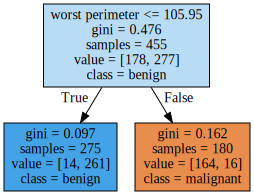

In [38]:
# len jeden atribut pouzity na rozhodnutie
graph = Source(export_graphviz(estimators[0], 
                               out_file=None,
                               feature_names=feature_names,
                               class_names=label_names,
                               filled = True))

display(SVG(graph.pipe(format='svg')))

# toto je tu len pre to aby sa mi obrazok zmestil na obrazovku
from IPython.display import HTML 
style = "<style>svg{width:100% !important;height:100% !important;}</style>"
HTML(style)

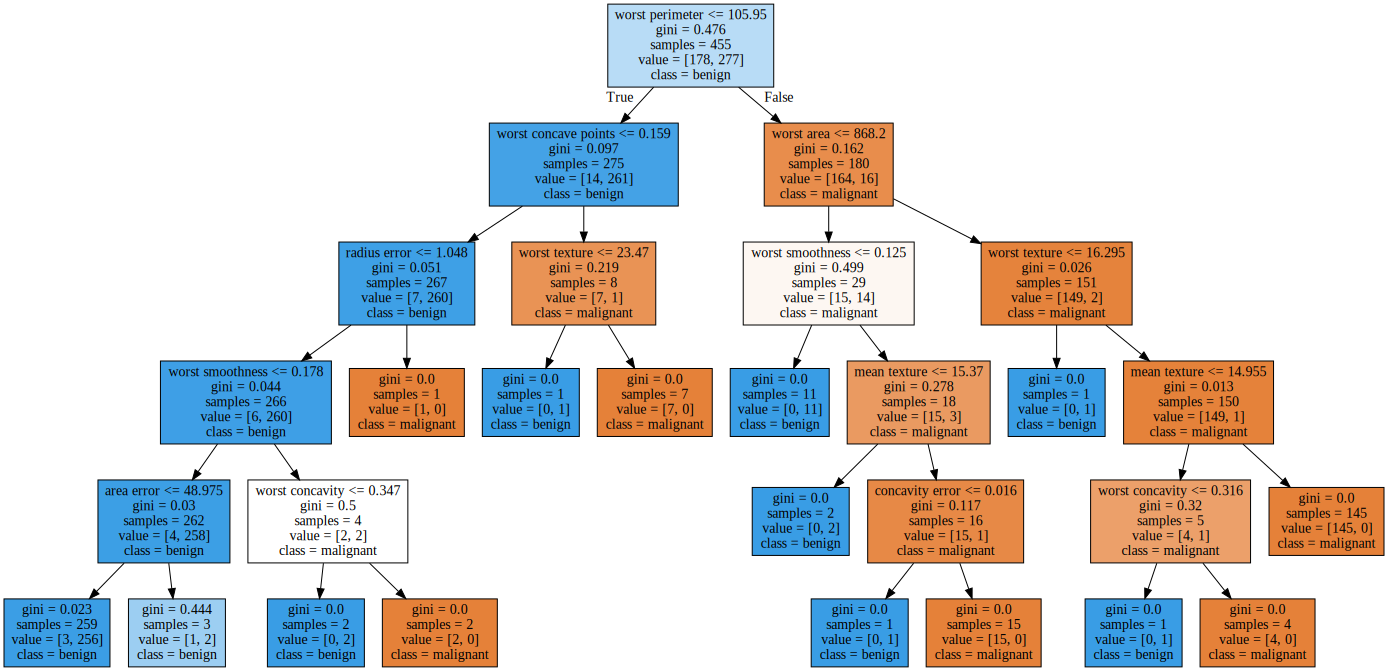

In [39]:
# model, za ktorym zacala rast chyba na validacnej vzorke
graph = Source(export_graphviz(estimators[4], 
                               out_file=None,
                               feature_names=feature_names,
                               class_names=label_names,
                               filled = True))

display(SVG(graph.pipe(format='svg')))

# toto je tu len pre to aby sa mi obrazok zmestil na obrazovku
from IPython.display import HTML 
style = "<style>svg{width:70% !important;height:70% !important;}</style>"
HTML(style)

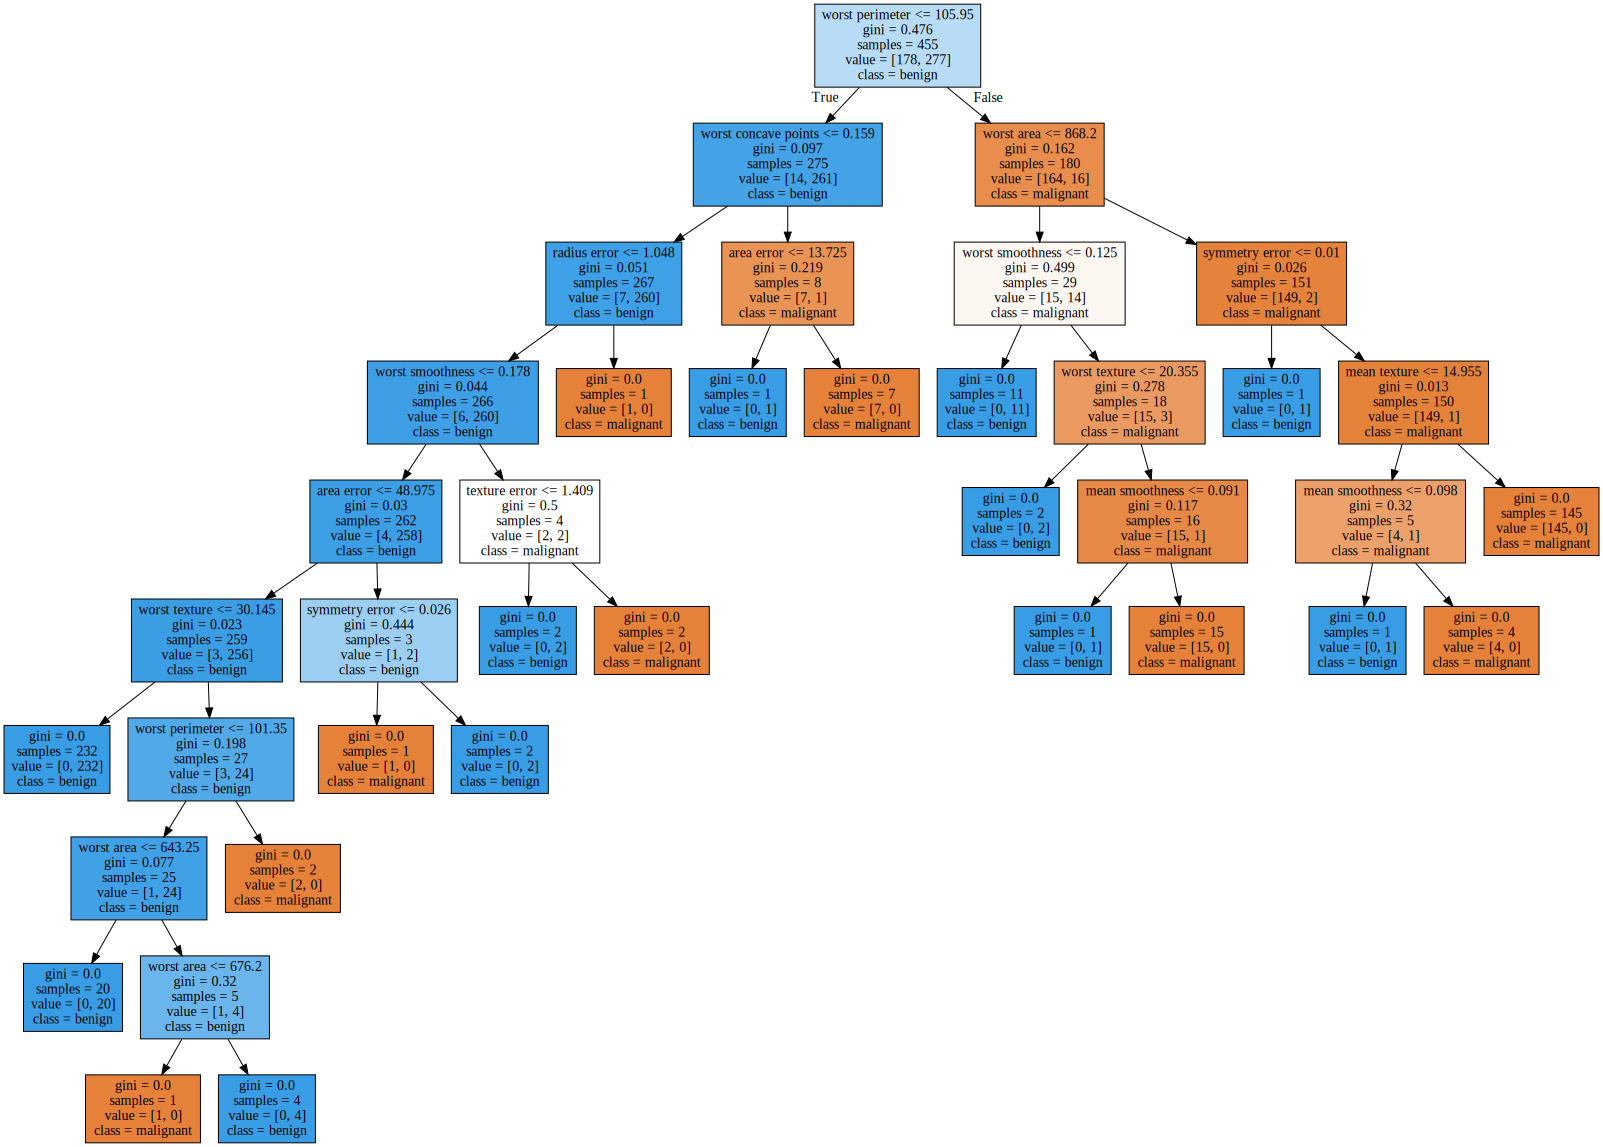

In [40]:
graph = Source(export_graphviz(estimators[-1], # najzlozitejsi model
                               out_file=None,
                               feature_names=feature_names,
                               class_names=label_names,
                               filled = True))

display(SVG(graph.pipe(format='svg')))

# toto je tu len pre to aby sa mi obrazok zmestil na obrazovku
from IPython.display import HTML 
style = "<style>svg{width:40% !important;height:40% !important;}</style>"
HTML(style)

# 4. Ako riešiť overfitting (opakovanie z 6. a 8. týždňa)

- **Získať viac dát :)**
- **Zjednodušenie modelu**

#### Feature selection
- Filter
- Wrapper
- Embedded

#### Ensemble learning
* **Bagging** 
Kombinovanie predikcii **nezávislých** modelov do jednej predikcie. Každý model musí byť **lepší ako náhoda**.
Používa sa na zníženie variancie

* **Boosting** 
Používa na zníženie biasu. Pozor, môže zvýšiť varianciu!
Iteratívne trénovanie ďalších klasifikátorov so zvýšenou váhou na tie pozorovania, na ktorých sa predchádzajúcim modelom nedarilo

#### Pruning
- Reduced-Error Pruning
- Rule Post-Pruning

## 4.1 Feature selection - Filter
- Najjednoduchšia možnosť je vyhodiť atribúty, ktoré majú všade rovnaké hodnoty
- Pozor, nie malú varianciu. Hlavne pri nevyvážených triedach môžu byt práve takéto atribúty veľmi užitočné

### 4.1.2 VarianceThreshold

In [41]:
from sklearn.feature_selection import VarianceThreshold

X = np.array([[0, 2, 0, 3], [0, 1, 4, 3], [0, 1, 1, 3]])
X

array([[0, 2, 0, 3],
       [0, 1, 4, 3],
       [0, 1, 1, 3]])

In [42]:
selector = VarianceThreshold(threshold=0.0)
selector.fit_transform(X)

array([[2, 0],
       [1, 4],
       [1, 1]])

### 4.1.2 Môžeme vyberať atribúty aj na základe závislosti atribútu a predikovanej hodnoty

In [43]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 # daju sa pouzit aj ine metriky

iris = load_iris()
X, y = iris.data, iris.target
X.shape

(150, 4)

**Napr.  Chi kvadrát použijeme na kvantifikovanie závislosti k predikovanej premennej, najlepšie atribúty necháme.**

In [44]:
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
X_new.shape

(150, 2)

### [Scikit-learn: Metrics](https://scikit-learn.org/stable/modules/classes.html?highlight=metrics#module-sklearn.metrics)
- Klasifikácia
  * chi2 - nezáporné čísla
  * mutual_info_classif - diskrétne dáta
  * f_classif - ANOVA medzi predikovanou premennou a atribútmi
- Regresia
  * f_regression - F test medzi predikovanou hodnotou a atribútmi
  * mutual_info_regression - Mutual information na reálnych číslach

### [Scikit-learn: Feature Section](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection)
**Výber K najlepších alebo nejaký percentil alebo nechať počet atribútov na štatistický test.**

* [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html) 
* [SelectPercentile](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html#sklearn.feature_selection.SelectPercentile)
* SelectFpr - false positive rate
* SelectFdr - false discovery rate  
* SelectFwe - family wise error
* GenericUnivariateSelect - Všetko dohromady a stratégia sa dá nastaviť parametrom

## 4.2 Feature selection - Wrapper

- Hľadáme podmnožinu atribútov, na ktorej bude model dávať najlepšie výsledky
- Skúšame rôzne podmnožiny, opakovane trénujeme nové modely a vyberáme tú najlepšiu podmnožinu, na ktorej model funguje najlepšie

### Problém

- Ak máme dataset s N atribútmi, tak počet rôznych podmnožín je $2^N$ --> natrénovať $2^N$ krát modelu.
- Chcelo by to nájsť proces, ktorý minimalizuje počet pokusov a zároveň maximalizuje úspešnosť modelu

### Scikit-Learn

* RFE - Recursive feature elimination
  - Postupne vyhadzovanie atribútov, ktoré majú v modeli najnižšiu váhu (potrebujeme aby to model vedel povedať) 

* RFECV - RFE with cross-validation
  - RFE s krízovou validáciou

### Mlxtend

* Sequential Forward Selection (SFS)
  - Postupne zväčšuje množinu atribútov o ten, ktorý najviac prispel k zlepšeniu
  - Začína s množinami veľkosti 1, vyberie najlepšiu a zafixuje atribút. K fixovanému atribútu pridá ďalší a vytvorí všetky možne podmnožiny veľkosti 2 s jedným zafixovaným atribútom. Vyberie najlepšiu ...

* Sequential Backward Selection (SBS)
  - Postupne zmenšuje množinu atribútov o ten, ktorý najmenej pomáhal.

* Sequential Floating Forward Selection (SFFS)
 -  SFS s pokusom o vyhodenie už pridaných atribútov ak sa ukáže že veľmi nepomáhajú 

* Sequential Floating Backward Selection (SFBS)
 - SBS s pokusom o pridanie už raz vyhodeného atribútu

### Priklad SFS

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
knn = KNeighborsClassifier(n_neighbors=4)

In [46]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(knn, k_features=3, forward=True,  floating=False, verbose=2, scoring='accuracy', cv=0)
# pomocou tejto triedy vieme robit SFS, SFFS, SBS aj SFBS a dokonca aj pridat cross-validaciu

sfs1 = sfs1.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished

[2021-12-06 01:34:14] Features: 1/3 -- score: 0.96[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished

[2021-12-06 01:34:14] Features: 2/3 -- score: 0.9733333333333334[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2021-12-06 01:34:14] Features: 3/3 -- score: 0.9733333333333334

**Zoznamy najlepších podmnožín atribútov pre jednotlivé veľkosti podmnožín**

In [47]:
sfs1.subsets_

{1: {'feature_idx': (3,),
  'cv_scores': array([0.96]),
  'avg_score': 0.96,
  'feature_names': ('3',)},
 2: {'feature_idx': (2, 3),
  'cv_scores': array([0.97333333]),
  'avg_score': 0.9733333333333334,
  'feature_names': ('2', '3')},
 3: {'feature_idx': (1, 2, 3),
  'cv_scores': array([0.97333333]),
  'avg_score': 0.9733333333333334,
  'feature_names': ('1', '2', '3')}}

## 4.3 Feature selection - Embedded

Skombinovať výhody filtrov a wrapprov
- Model, ktorý sa trénuje si bude priamo vyberať atribúty, ktoré sú pre neho najlepšie

Len málo modelov to podporuje
* Lineárne modely penalizované L1 (Lasso) alebo L1+L2 (Elastic Net) regularizáciou: SVM, Lineárna regresia, Logistická regresia ...

- Regularizácia zavádza do modelu penalizáciu za počet / veľkosť váh atribútov modelu. Nie je tam len chyba predikcie. Prirodzene sa tak vyberá jednoduchší model.

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
iris = load_iris()
X, y = iris.data, iris.target
X.shape

(150, 4)

## 4.4 RandomForest
**Po natrénovaní náhodného lesu viem vybrať dôležitosť atribútov.**
- Náhodný les je zjednodušene povedane: skupina stromov.
- Viem sa pozrieť aké atribúty používajú stromy na rozhodovanie a ako vysoko sú v nich a podľa toho odvodiť ich dôležitosť.

In [49]:
clf = RandomForestClassifier()
clf = clf.fit(X, y)
clf.feature_importances_  

array([0.11475641, 0.02099759, 0.45185676, 0.41238924])

In [50]:
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape  

(150, 2)

# Poznámky

* Rozhodovacie stromy sú pomerne jednoduchý ale zároveň veľmi silný nástroj.

* Pri stromoch sa veľmi dobre interpretuje natrénovaný model pomocou pravidiel.

* Pozor na pretrénovanie (nie len pri stromoch)

* Výber atribútov je dobrý na redukciu problému prekliatia dimenzionality.
  * Ak používate nejaký lineárny model alebo les, je možne že filtre budú zbytočné. 
  * Podobné pre wrappers. 
  * Môžete využiť to, že sa dajú použiť na embedded výber atribútov